# 영역 추정 (Region Proposal)

In [1]:
!pip install selectivesearch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4382 sha256=c54e09dc47051c23f010393eb2454bdbfe75715c1a4d45839e686d97df376579
  Stored in directory: c:\users\ljh10\appdata\local\pip\cache\wheels\dd\5d\c1\1f9a5d313a93983d5d76cd3f1a4adb286a17176e65c6f704cb
Successfully built selectivesearch


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import selectivesearch as ss

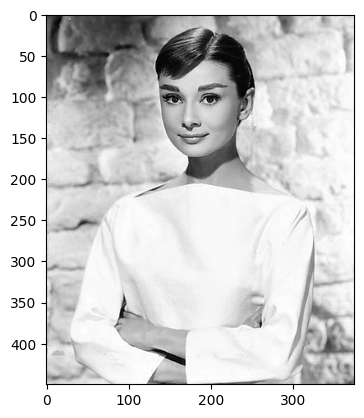

In [4]:
image = cv2.cvtColor(cv2.imread('./image/audrey.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [ ]:
img,regions = ss.selective_search(image, scale= 100, min_size=2000)
regions

In [10]:
def iou(candidate, ground_truth):
    x1 = np.maximum(candidate[0], ground_truth[0])
    y1 = np.maximum(candidate[1], ground_truth[1])
    x2 = np.maximum(candidate[2], ground_truth[2])
    y2 = np.maximum(candidate[3], ground_truth[3])
    intersection = np.maximum(0,x2-x1) * np.maximum(0, y2-y1)

    candidate_area = (candidate[2] - candidate[0]) * (candidate[3] - candidate[1])
    ground_truth_area = (ground_truth[2] - ground_truth[0]) * (ground_truth[3] - ground_truth[1])
    union = candidate_area + ground_truth_area - intersection

    return intersection / union


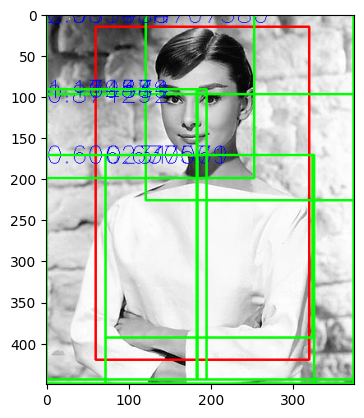

In [11]:
# 감지 영역
candidate_bnd_boxes = [region['rect'] for region in regions if region['size'] > 20000]

# 정답영역
ground_truth_box = (60,15,320,420)
gt_x1, gt_y1, gt_x2, gt_y2 = ground_truth_box

base_image = image.copy()
cv2.rectangle(base_image, (gt_x1,gt_y1), (gt_x2,gt_y2), color=(255,0,0), thickness=2)

for candidate in candidate_bnd_boxes:
    x1, y1, width, height = candidate
    x2,y2 = x1+width, y1+height
    
    iou_source = iou((x1,y1,x2,y2), ground_truth_box)

    if iou_source > 0.5:
        cv2.rectangle(base_image, (x1,y1), (x2,y2), color=(0,0,255), thickness=2)
        cv2.putText(base_image, f'{iou_source:2f}', (x1,y1+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), thickness=1)
    
    cv2.rectangle(base_image, (x1,y1), (x2,y2), color=(0,255,0), thickness=2)
plt.imshow(base_image)

In [12]:
!pip install ultralytics

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/949.8 kB ? eta -:--:--
   ---------------------------------------- 949.8/949.8 kB 8.8 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [13]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
result = model('./image/birds.jpg',conf=0.6)
result[0].show()

100%|██████████| 5.35M/5.35M [00:00<00:00, 11.8MB/s]



image 1/1 c:\SKNetworks_AI\ai-learning\AI-learning\LLM\09_open_cv\image\birds.jpg: 480x640 4 birds, 145.7ms
Speed: 2.1ms preprocess, 145.7ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)
